# Hill Climbing para Minimizar: Encontrando el Punto Más Cercano

## Introducción

Imagina que tienes una recta numérica y quieres encontrar el punto que esté **más cerca del número 7**. Parece simple, ¿verdad? La respuesta obvia es 7 mismo. Pero, ¿cómo podría un algoritmo descubrir esto por sí solo?

### El Problema

**Objetivo:** Encontrar el valor de x que **minimice** la distancia al número 7.

**Función de distancia:**
$$d(x) = |x - 7|$$

Esta función nos dice qué tan lejos está cualquier número x del número 7.

### El Desafío

Aquí hay un problema: **Hill Climbing es un algoritmo que solo sabe SUBIR** (maximizar). Es como un excursionista que siempre busca ir hacia arriba en una montaña. Pero nosotros queremos **BAJAR** (minimizar la distancia).

### La Solución: El Truco de la Negación

La solución es simple pero ingeniosa: **le pedimos al algoritmo que maximice la distancia negativa**.

**Función objetivo para Hill Climbing:**
$$f(x) = -|x - 7|$$

### ¿Por qué Funciona Este Truco?

| Concepto | Función de Distancia | Función Objetivo |
|----------|---------------------|------------------|
| **Fórmula** | $d(x) = \|x - 7\|$ | $f(x) = -\|x - 7\|$ |
| **En x = 7** | d(7) = 0 (mínimo) | f(7) = 0 (máximo) |
| **En x = 0** | d(0) = 7 (alto) | f(0) = -7 (bajo) |
| **En x = 15** | d(15) = 8 (alto) | f(15) = -8 (bajo) |

**La magia:** Donde d(x) tiene su **mínimo** (más bajo), f(x) tiene su **máximo** (más alto).

### Analogía

Es como voltear una montaña al revés:
- 🏔️ **Distancia real:** Un valle profundo en x = 7 (queremos el fondo)
- ⛰️ **Distancia negativa:** Un pico alto en x = 7 (queremos la cima)

Hill Climbing puede subir la montaña invertida y encontrar la cima, que corresponde al fondo del valle original.

### Lo que Haremos

1. Definir la función objetivo f(x) = -|x - 7|
2. Implementar Hill Climbing para maximizar f(x)
3. Demostrar que la solución encontrada minimiza la distancia a 7
4. Visualizar todo el proceso

¡Empecemos! 🚀

## 1. La Función Objetivo: De Minimizar a Maximizar

### El Problema Original (Minimización)

Queremos **minimizar** la distancia a 7:
$$d(x) = |x - 7|$$

**Características de d(x):**
- 📉 Es una función en forma de "V"
- 🎯 Su valor mínimo es 0, que ocurre en x = 7
- 📊 Crece linealmente al alejarnos de 7 en cualquier dirección

### La Transformación (Maximización)

Para usar Hill Climbing, transformamos el problema a **maximizar**:
$$f(x) = -|x - 7|$$

**Características de f(x):**
- 📈 Es una función en forma de "V" invertida (o forma de carpa ⛺)
- 🎯 Su valor máximo es 0, que ocurre en x = 7
- 📊 Decrece linealmente al alejarnos de 7 en cualquier dirección

### ¿Por qué es Equivalente?

La operación matemática es simple:

$$\text{minimizar } d(x) = |x - 7| \quad \Leftrightarrow \quad \text{maximizar } f(x) = -|x - 7|$$

**Demostración:**
- Si x₁ está más cerca de 7 que x₂, entonces:
  - d(x₁) < d(x₂) (menor distancia)
  - -d(x₁) > -d(x₂) (mayor valor negativo)
  - Por lo tanto: f(x₁) > f(x₂)

### El Principio General

Esta es una técnica fundamental en optimización:

> **Minimizar g(x) es equivalente a maximizar -g(x)**

Esta transformación nos permite usar algoritmos de maximización (como Hill Climbing) para resolver problemas de minimización.

🔍 Verificación de las Funciones
x          Distancia d(x)       Función Objetivo f(x)
----------------------------------------------------------------------
0          7.00                 -7.00               
3          4.00                 -4.00               
7          0.00                 0.00                
10         3.00                 -3.00               
15         8.00                 -8.00               

💡 Observa: Donde d(x) es mínima (x=7), f(x) es máxima


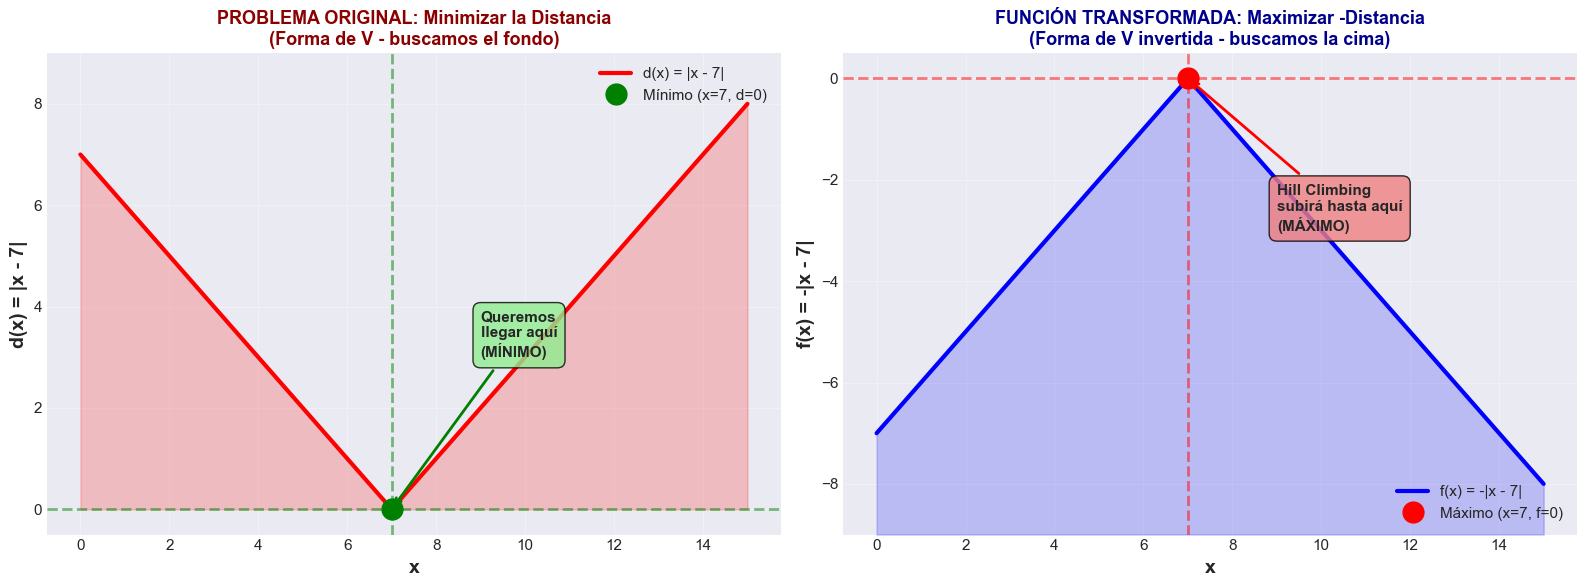


✅ Funciones definidas y visualizadas correctamente
📊 Observa cómo la gráfica 2 es la gráfica 1 'volteada' verticalmente


In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import random

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

# Definir la función de distancia (lo que queremos minimizar)
def distancia(x):
    """
    Calcula la distancia entre x y 7.
    Esta es la función que QUEREMOS MINIMIZAR.
    
    Parámetros:
    -----------
    x : float o array
        Valor(es) de x
        
    Retorna:
    --------
    float o array : Distancia(s) a 7
    """
    return np.abs(x - 7)

# Definir la función objetivo (lo que maximizará Hill Climbing)
def f(x):
    """
    Función objetivo para Hill Climbing: NEGATIVO de la distancia.
    Esta es la función que VAMOS A MAXIMIZAR.
    
    Fórmula: f(x) = -|x - 7|
    
    Parámetros:
    -----------
    x : float o array
        Valor(es) de x
        
    Retorna:
    --------
    float o array : Negativo de la distancia a 7
    """
    return -np.abs(x - 7)

# Verificar las funciones en puntos clave
print("🔍 Verificación de las Funciones")
print("="*70)
print(f"{'x':<10} {'Distancia d(x)':<20} {'Función Objetivo f(x)'}")
print("-"*70)
for x_test in [0, 3, 7, 10, 15]:
    print(f"{x_test:<10} {distancia(x_test):<20.2f} {f(x_test):<20.2f}")
print("="*70)
print("\n💡 Observa: Donde d(x) es mínima (x=7), f(x) es máxima")

# Crear las visualizaciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Rango de valores
x_valores = np.linspace(0, 15, 500)
d_valores = distancia(x_valores)
f_valores = f(x_valores)

# ===== GRÁFICA 1: Función de Distancia (Minimización) =====
ax1.plot(x_valores, d_valores, 'r-', linewidth=3, label='d(x) = |x - 7|')
ax1.plot(7, 0, 'go', markersize=15, label='Mínimo (x=7, d=0)', zorder=5)
ax1.axvline(x=7, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax1.axhline(y=0, color='green', linestyle='--', linewidth=2, alpha=0.5)

# Sombrear el área
ax1.fill_between(x_valores, d_valores, alpha=0.2, color='red')

# Anotaciones
ax1.annotate('Queremos\nllegar aquí\n(MÍNIMO)', xy=(7, 0), xytext=(9, 3),
            fontsize=11, fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

ax1.set_xlabel('x', fontsize=14, fontweight='bold')
ax1.set_ylabel('d(x) = |x - 7|', fontsize=14, fontweight='bold')
ax1.set_title('PROBLEMA ORIGINAL: Minimizar la Distancia\n(Forma de V - buscamos el fondo)', 
              fontsize=13, fontweight='bold', color='darkred')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=11)
ax1.set_ylim(-0.5, 9)

# ===== GRÁFICA 2: Función Objetivo (Maximización) =====
ax2.plot(x_valores, f_valores, 'b-', linewidth=3, label='f(x) = -|x - 7|')
ax2.plot(7, 0, 'ro', markersize=15, label='Máximo (x=7, f=0)', zorder=5)
ax2.axvline(x=7, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.5)

# Sombrear el área
ax2.fill_between(x_valores, f_valores, -9, alpha=0.2, color='blue')

# Anotaciones
ax2.annotate('Hill Climbing\nsubirá hasta aquí\n(MÁXIMO)', xy=(7, 0), xytext=(9, -3),
            fontsize=11, fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.8))

ax2.set_xlabel('x', fontsize=14, fontweight='bold')
ax2.set_ylabel('f(x) = -|x - 7|', fontsize=14, fontweight='bold')
ax2.set_title('FUNCIÓN TRANSFORMADA: Maximizar -Distancia\n(Forma de V invertida - buscamos la cima)', 
              fontsize=13, fontweight='bold', color='darkblue')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='lower right', fontsize=11)
ax2.set_ylim(-9, 0.5)

plt.tight_layout()
plt.show()

print("\n✅ Funciones definidas y visualizadas correctamente")
print("📊 Observa cómo la gráfica 2 es la gráfica 1 'volteada' verticalmente")

## 2. Implementando el Algoritmo Hill Climbing

Ahora implementaremos el algoritmo Hill Climbing que maximizará f(x) = -|x - 7|, lo cual es equivalente a minimizar la distancia a 7.

### Lógica del Algoritmo

El algoritmo Hill Climbing sigue estos pasos:

1. **Inicializar:** Comenzar en un valor x aleatorio (por ejemplo, en el rango [0, 15])

2. **Generar vecinos:** Calcular dos movimientos posibles:
   - Vecino izquierda: x - paso
   - Vecino derecha: x + paso

3. **Evaluar vecinos:** Calcular f(x) para cada vecino

4. **Decidir:**
   - Buscar el vecino con el **mayor valor de f(x)**
   - Si ese vecino es **mejor** que el x actual → moverse al vecino
   - Si ningún vecino mejora → **detenerse** (hemos llegado al máximo)

5. **Repetir:** Volver al paso 2 hasta que el algoritmo se detenga

### ¿Por Qué Funciona?

- 🎯 Hill Climbing sube por la "montaña invertida" de f(x)
- 🏔️ La cima de f(x) (en x = 7) corresponde al fondo del valle de d(x)
- ✅ Al encontrar el máximo de f(x), encontramos el mínimo de d(x)

### Comportamiento del Algoritmo

```
Ejemplo de movimiento:

Si x actual = 3.0:
  f(3.0) = -|3.0 - 7| = -4.0

Vecinos con paso = 0.5:
  Vecino izquierda: x = 2.5, f(2.5) = -|2.5 - 7| = -4.5 ❌ (peor)
  Vecino derecha:   x = 3.5, f(3.5) = -|3.5 - 7| = -3.5 ✅ (mejor)

El algoritmo se mueve a x = 3.5 porque f(3.5) > f(3.0)
Esto lo acerca a 7, reduciendo la distancia.
```

In [2]:
def hill_climbing(start_x, step, domain, max_iter=1000):
    """
    Implementa el algoritmo Hill Climbing para MAXIMIZAR f(x) = -|x - 7|,
    lo cual es equivalente a MINIMIZAR la distancia a 7.
    
    Parámetros:
    -----------
    start_x : float
        Valor inicial de x (punto de partida)
    step : float
        Tamaño del paso para explorar vecinos
    domain : tuple
        Tupla (min, max) que define el dominio para x
    max_iter : int
        Número máximo de iteraciones
        
    Retorna:
    --------
    tuple : (x_final, historial)
        - x_final: El mejor valor de x encontrado
        - historial: Lista con todos los valores de x visitados
    """
    
    # Estado inicial
    x_actual = start_x
    f_actual = f(x_actual)
    d_actual = distancia(x_actual)
    
    # Historial para visualización
    historial = [x_actual]
    
    print(f"🚀 Iniciando Hill Climbing (Maximizando f(x) = -|x - 7|)")
    print(f"📍 Punto inicial: x = {x_actual:.4f}")
    print(f"📊 f(x) inicial = {f_actual:.4f} | Distancia a 7 = {d_actual:.4f}")
    print(f"🎯 Objetivo: Encontrar x = 7 (donde f(x) = 0 es máximo)")
    print("="*70)
    
    # Iteraciones del algoritmo
    iteracion = 0
    mejora = True
    
    while mejora and iteracion < max_iter:
        iteracion += 1
        mejora = False
        
        # Generar vecinos
        vecinos = [
            x_actual - step,  # Vecino izquierda
            x_actual + step   # Vecino derecha
        ]
        
        # Aplicar restricciones de dominio
        vecinos = [max(domain[0], min(domain[1], v)) for v in vecinos]
        
        # Evaluar los vecinos
        mejor_vecino = None
        mejor_f = f_actual
        
        for vecino in vecinos:
            f_vecino = f(vecino)
            # Hill Climbing busca MAXIMIZAR, así que buscamos el mayor f(x)
            if f_vecino > mejor_f:
                mejor_vecino = vecino
                mejor_f = f_vecino
        
        # Si encontramos un vecino mejor, nos movemos
        if mejor_vecino is not None:
            d_mejor = distancia(mejor_vecino)
            
            # Determinar dirección del movimiento
            direccion = "→" if mejor_vecino > x_actual else "←"
            
            print(f"Iter {iteracion:3d}: x = {x_actual:.4f} {direccion} x = {mejor_vecino:.4f} | "
                  f"f(x) = {f_actual:.4f} → {mejor_f:.4f} | "
                  f"dist = {d_actual:.4f} → {d_mejor:.4f} ✅")
            
            x_actual = mejor_vecino
            f_actual = mejor_f
            d_actual = d_mejor
            historial.append(x_actual)
            mejora = True
        else:
            print(f"\n🎯 Máximo alcanzado en iteración {iteracion}")
            print(f"   Ningún vecino mejora f(x) actual = {f_actual:.4f}")
    
    if iteracion >= max_iter:
        print(f"\n⚠️ Alcanzado el límite de iteraciones ({max_iter})")
    
    print("="*70)
    print(f"\n✅ Algoritmo finalizado")
    print(f"🎯 Solución encontrada: x = {x_actual:.4f}")
    print(f"📊 Valor de f(x) = {f_actual:.4f} (máximo)")
    print(f"📏 Distancia a 7 = {d_actual:.4f} (mínimo)")
    print(f"🔄 Total de iteraciones: {len(historial) - 1}")
    
    # Verificar éxito
    if abs(x_actual - 7.0) < step:
        print(f"\n✅ ¡ÉXITO! Encontramos el punto más cercano a 7")
    else:
        print(f"\n⚠️ Solución aproximada (dentro de precisión del paso)")
    
    return x_actual, historial

print("✅ Función hill_climbing() implementada correctamente")
print("\n💡 Nota: El algoritmo MAXIMIZA f(x) = -|x-7|, lo que equivale a MINIMIZAR |x-7|")

✅ Función hill_climbing() implementada correctamente

💡 Nota: El algoritmo MAXIMIZA f(x) = -|x-7|, lo que equivale a MINIMIZAR |x-7|


## 3. Encontrando el Punto Más Cercano a 7

Ahora ejecutaremos el algoritmo Hill Climbing para encontrar el punto más cercano a 7.

### Parámetros del Experimento

- **Dominio:** [0, 15] (rango de búsqueda)
- **Tamaño de paso:** 0.1
- **Punto inicial:** Aleatorio en [0, 15]

### ¿Qué Esperamos?

El algoritmo debería:
1. ✅ Empezar en un punto aleatorio
2. ✅ Moverse iterativamente hacia x = 7
3. ✅ Detenerse cuando alcance x ≈ 7 (el máximo de f(x))
4. ✅ Confirmar que esta solución minimiza la distancia a 7

Independientemente del punto inicial, el algoritmo **siempre** debería converger a x ≈ 7, porque f(x) tiene un único máximo global en ese punto.

In [3]:
# Configurar los parámetros del problema
domain = [0, 15]     # Dominio de búsqueda
step = 0.1           # Tamaño del paso

# Generar un punto de inicio ALEATORIO dentro del dominio
random.seed()  # Asegurar aleatoriedad
start_x = random.uniform(domain[0], domain[1])

print(f"🎲 Punto de inicio aleatorio generado: x = {start_x:.4f}")
print(f"📊 Distancia inicial a 7: {distancia(start_x):.4f}")
print(f"📊 Valor inicial de f(x): {f(start_x):.4f}")
print("\n")

# Ejecutar el algoritmo Hill Climbing
x_final, historial = hill_climbing(start_x=start_x, step=step, domain=domain)

# Análisis detallado del resultado
print("\n" + "="*70)
print("📊 ANÁLISIS DETALLADO DE RESULTADOS")
print("="*70)

print(f"\n📍 Trayectoria Completa:")
print(f"   Inicio:  x = {historial[0]:.4f}")
print(f"   Final:   x = {historial[-1]:.4f}")
print(f"   Número de pasos: {len(historial) - 1}")
print(f"   Desplazamiento total: {abs(historial[-1] - historial[0]):.4f} unidades")

print(f"\n🎯 Comparación con la Solución Ideal:")
print(f"   Solución ideal:        x = 7.0000")
print(f"   Solución encontrada:   x = {x_final:.4f}")
print(f"   Error:                 {abs(x_final - 7.0):.4f}")

print(f"\n📏 Análisis de Distancia (Lo que queríamos MINIMIZAR):")
print(f"   Distancia inicial:     d({historial[0]:.4f}) = {distancia(historial[0]):.4f}")
print(f"   Distancia final:       d({x_final:.4f}) = {distancia(x_final):.4f}")
print(f"   Reducción:             {distancia(historial[0]) - distancia(x_final):.4f}")

print(f"\n📈 Análisis de f(x) (Lo que el algoritmo MAXIMIZÓ):")
print(f"   f(x) inicial:          {f(historial[0]):.4f}")
print(f"   f(x) final:            {f(x_final):.4f}")
print(f"   Incremento:            {f(x_final) - f(historial[0]):.4f}")

print(f"\n🛣️  Primeros y Últimos 5 Pasos:")
mostrar_inicio = min(5, len(historial))
mostrar_fin = min(5, len(historial))

print("   Inicio del camino:")
for i in range(mostrar_inicio):
    print(f"     Paso {i}: x = {historial[i]:.4f}, distancia = {distancia(historial[i]):.4f}")

if len(historial) > 10:
    print("     ...")
    
print("   Final del camino:")
for i in range(max(0, len(historial) - mostrar_fin), len(historial)):
    print(f"     Paso {i}: x = {historial[i]:.4f}, distancia = {distancia(historial[i]):.4f}")

# Verificación del éxito
print(f"\n{'='*70}")
if abs(x_final - 7.0) < step * 2:
    print("✅ ¡ÉXITO TOTAL! El algoritmo encontró el punto más cercano a 7")
    print(f"   (Error menor que {step * 2:.4f}, que es aceptable dado el tamaño de paso)")
else:
    print("⚠️ Solución aproximada encontrada")

print(f"\n💡 CONCLUSIÓN CLAVE:")
print(f"   Al maximizar f(x) = -{distancia(x_final):.4f}, minimizamos la distancia")
print(f"   El máximo de f(x) = {f(x_final):.4f} corresponde al mínimo de d(x) = {distancia(x_final):.4f}")
print("="*70)

🎲 Punto de inicio aleatorio generado: x = 14.1473
📊 Distancia inicial a 7: 7.1473
📊 Valor inicial de f(x): -7.1473


🚀 Iniciando Hill Climbing (Maximizando f(x) = -|x - 7|)
📍 Punto inicial: x = 14.1473
📊 f(x) inicial = -7.1473 | Distancia a 7 = 7.1473
🎯 Objetivo: Encontrar x = 7 (donde f(x) = 0 es máximo)
Iter   1: x = 14.1473 ← x = 14.0473 | f(x) = -7.1473 → -7.0473 | dist = 7.1473 → 7.0473 ✅
Iter   2: x = 14.0473 ← x = 13.9473 | f(x) = -7.0473 → -6.9473 | dist = 7.0473 → 6.9473 ✅
Iter   3: x = 13.9473 ← x = 13.8473 | f(x) = -6.9473 → -6.8473 | dist = 6.9473 → 6.8473 ✅
Iter   4: x = 13.8473 ← x = 13.7473 | f(x) = -6.8473 → -6.7473 | dist = 6.8473 → 6.7473 ✅
Iter   5: x = 13.7473 ← x = 13.6473 | f(x) = -6.7473 → -6.6473 | dist = 6.7473 → 6.6473 ✅
Iter   6: x = 13.6473 ← x = 13.5473 | f(x) = -6.6473 → -6.5473 | dist = 6.6473 → 6.5473 ✅
Iter   7: x = 13.5473 ← x = 13.4473 | f(x) = -6.5473 → -6.4473 | dist = 6.5473 → 6.4473 ✅
Iter   8: x = 13.4473 ← x = 13.3473 | f(x) = -6.4473 → -6.3473 

### 3.1 Visualización del Proceso de Optimización

Ahora visualizaremos cómo el algoritmo Hill Climbing encontró el punto más cercano a 7.

Veremos dos perspectivas:
1. **Perspectiva del algoritmo:** Maximizando f(x) = -|x - 7| (subiendo la montaña invertida)
2. **Perspectiva del problema:** Minimizando d(x) = |x - 7| (bajando al valle)

Ambas perspectivas son equivalentes y muestran el mismo proceso desde diferentes ángulos.

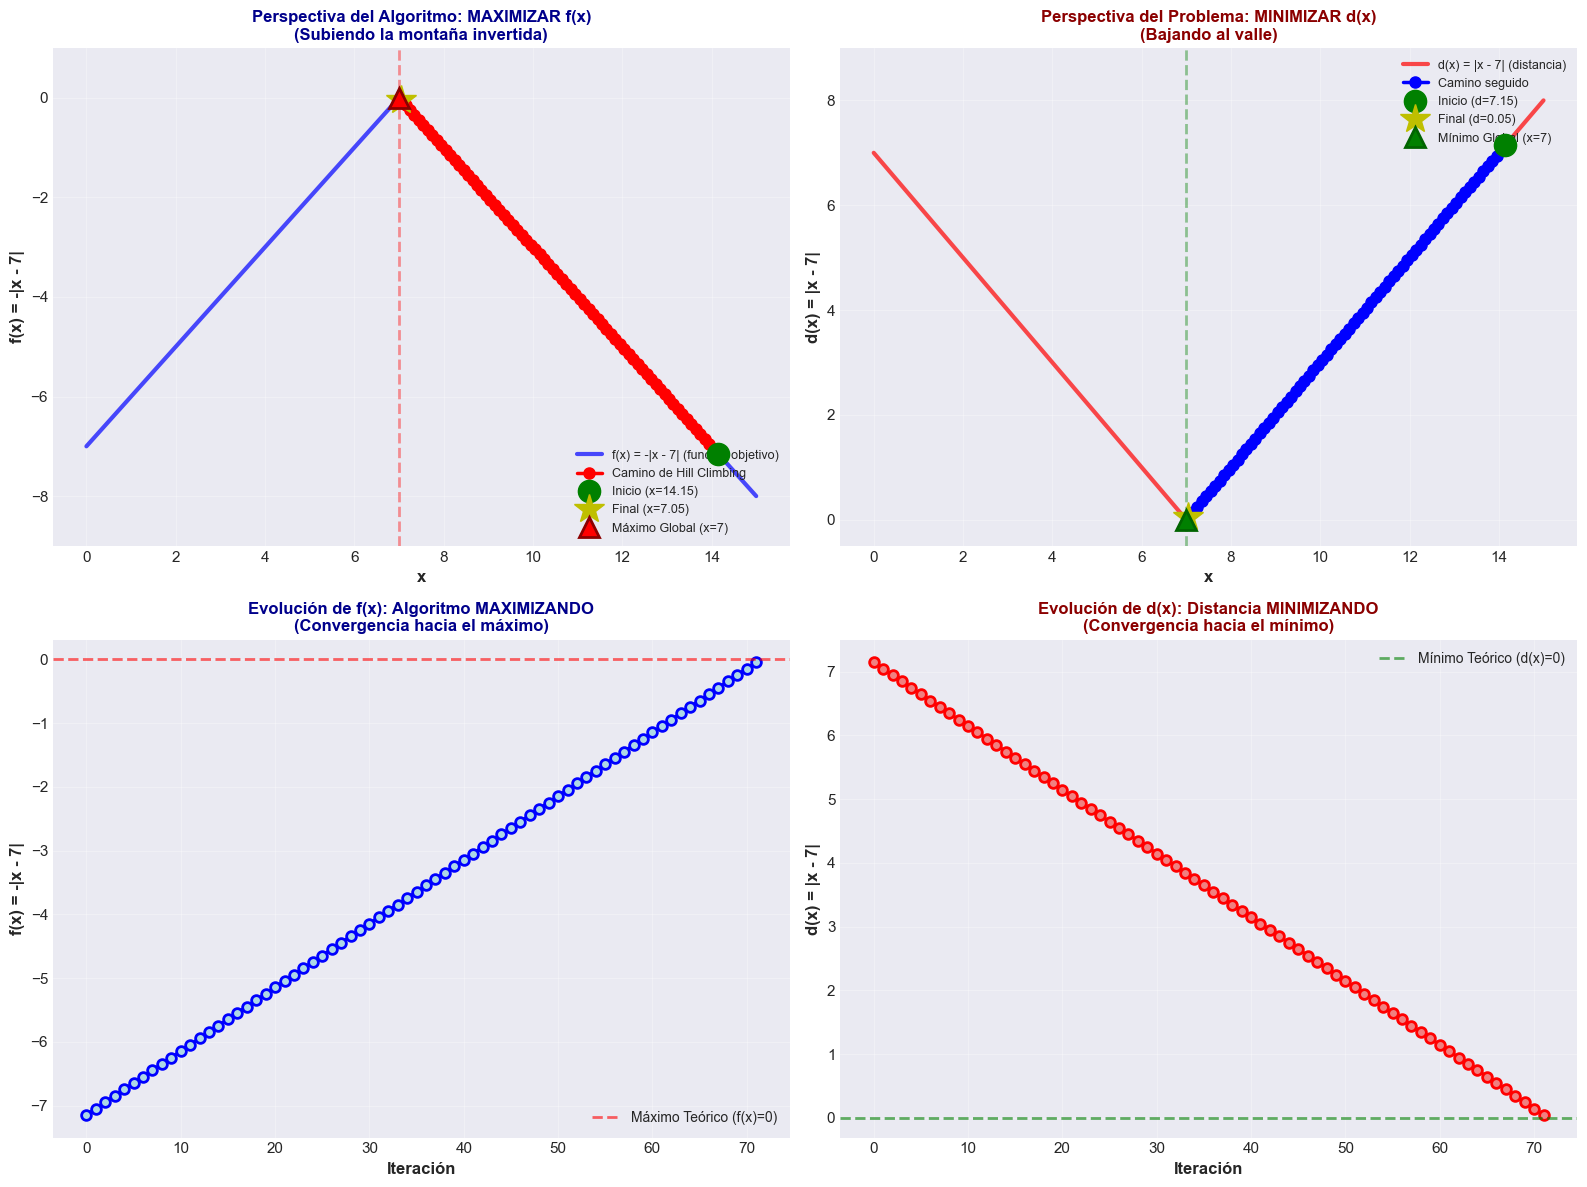

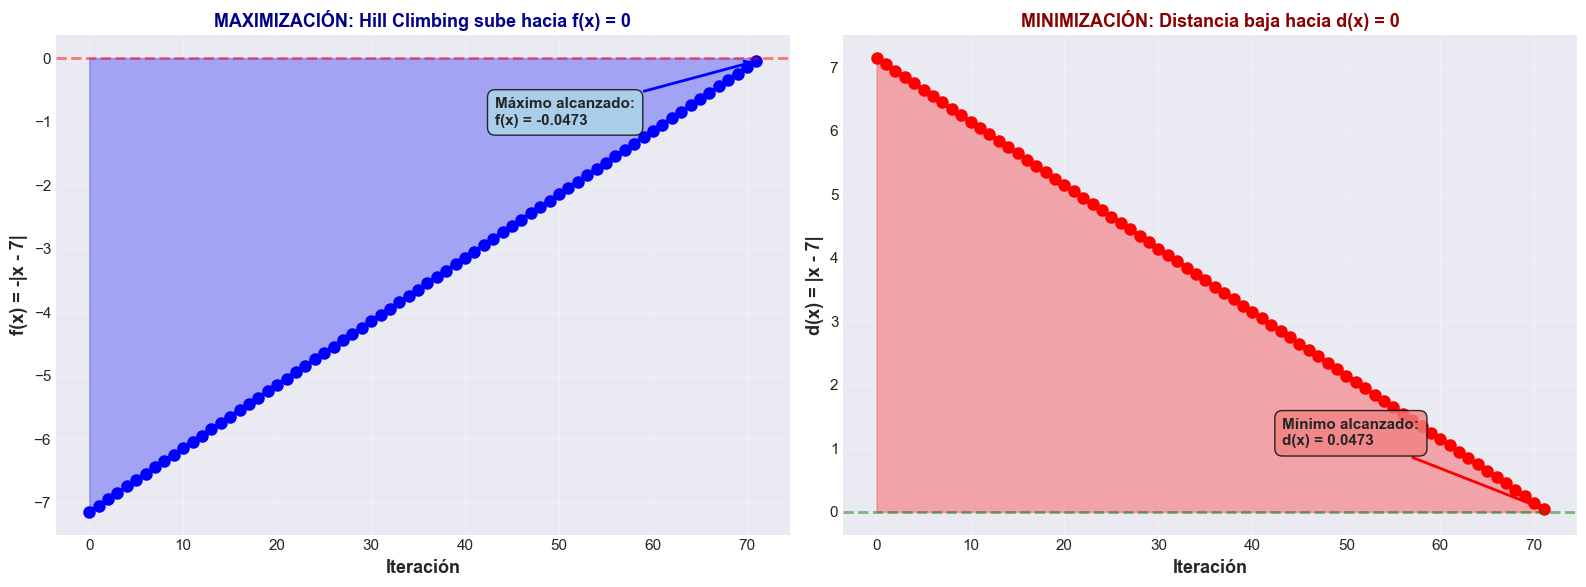


📊 Visualizaciones generadas exitosamente
   • Gráfica 1: Camino sobre f(x) - Perspectiva de maximización
   • Gráfica 2: Camino sobre d(x) - Perspectiva de minimización
   • Gráfica 3: Evolución de f(x) - El algoritmo sube
   • Gráfica 4: Evolución de d(x) - La distancia baja
   • Gráfica 5: Comparación directa del mismo proceso


In [4]:
# Preparar datos para visualización
historial_array = np.array(historial)
f_historial = f(historial_array)
d_historial = distancia(historial_array)

# Crear visualización completa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ===== GRÁFICA 1: Función Objetivo f(x) con el camino =====
ax1 = axes[0, 0]
ax1.plot(x_valores, f_valores, 'b-', linewidth=3, alpha=0.7, 
         label='f(x) = -|x - 7| (función objetivo)')
ax1.plot(historial, f_historial, 'ro-', linewidth=2.5, markersize=8, 
         label='Camino de Hill Climbing', zorder=5)
ax1.plot(historial[0], f(historial[0]), 'go', markersize=16, 
         label=f'Inicio (x={historial[0]:.2f})', zorder=6)
ax1.plot(historial[-1], f(historial[-1]), 'y*', markersize=22, 
         label=f'Final (x={historial[-1]:.2f})', zorder=6)
ax1.plot(7, 0, 'r^', markersize=14, label='Máximo Global (x=7)', 
         zorder=6, markeredgewidth=2, markeredgecolor='darkred')
ax1.axvline(x=7, color='red', linestyle='--', linewidth=2, alpha=0.4)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('f(x) = -|x - 7|', fontsize=12, fontweight='bold')
ax1.set_title('Perspectiva del Algoritmo: MAXIMIZAR f(x)\n(Subiendo la montaña invertida)', 
              fontsize=12, fontweight='bold', color='darkblue')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='lower right', fontsize=9)
ax1.set_ylim(-9, 1)

# ===== GRÁFICA 2: Función de Distancia con el camino =====
ax2 = axes[0, 1]
ax2.plot(x_valores, d_valores, 'r-', linewidth=3, alpha=0.7, 
         label='d(x) = |x - 7| (distancia)')
ax2.plot(historial, d_historial, 'bo-', linewidth=2.5, markersize=8, 
         label='Camino seguido', zorder=5)
ax2.plot(historial[0], distancia(historial[0]), 'go', markersize=16, 
         label=f'Inicio (d={distancia(historial[0]):.2f})', zorder=6)
ax2.plot(historial[-1], distancia(historial[-1]), 'y*', markersize=22, 
         label=f'Final (d={distancia(historial[-1]):.2f})', zorder=6)
ax2.plot(7, 0, 'g^', markersize=14, label='Mínimo Global (x=7)', 
         zorder=6, markeredgewidth=2, markeredgecolor='darkgreen')
ax2.axvline(x=7, color='green', linestyle='--', linewidth=2, alpha=0.4)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('d(x) = |x - 7|', fontsize=12, fontweight='bold')
ax2.set_title('Perspectiva del Problema: MINIMIZAR d(x)\n(Bajando al valle)', 
              fontsize=12, fontweight='bold', color='darkred')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=9)
ax2.set_ylim(-0.5, 9)

# ===== GRÁFICA 3: Evolución de f(x) por iteración =====
ax3 = axes[1, 0]
iteraciones = range(len(historial))
ax3.plot(iteraciones, f_historial, 'b-o', linewidth=2.5, markersize=7,
         markerfacecolor='lightblue', markeredgecolor='blue', markeredgewidth=2)
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.6, 
            label='Máximo Teórico (f(x)=0)')
ax3.set_xlabel('Iteración', fontsize=12, fontweight='bold')
ax3.set_ylabel('f(x) = -|x - 7|', fontsize=12, fontweight='bold')
ax3.set_title('Evolución de f(x): Algoritmo MAXIMIZANDO\n(Convergencia hacia el máximo)', 
              fontsize=12, fontweight='bold', color='darkblue')
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=10)

# ===== GRÁFICA 4: Evolución de la distancia por iteración =====
ax4 = axes[1, 1]
ax4.plot(iteraciones, d_historial, 'r-o', linewidth=2.5, markersize=7,
         markerfacecolor='lightcoral', markeredgecolor='red', markeredgewidth=2)
ax4.axhline(y=0, color='green', linestyle='--', linewidth=2, alpha=0.6, 
            label='Mínimo Teórico (d(x)=0)')
ax4.set_xlabel('Iteración', fontsize=12, fontweight='bold')
ax4.set_ylabel('d(x) = |x - 7|', fontsize=12, fontweight='bold')
ax4.set_title('Evolución de d(x): Distancia MINIMIZANDO\n(Convergencia hacia el mínimo)', 
              fontsize=12, fontweight='bold', color='darkred')
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Gráfica adicional: Comparación lado a lado del progreso
fig, (ax_max, ax_min) = plt.subplots(1, 2, figsize=(16, 6))

# Maximización
ax_max.plot(iteraciones, f_historial, 'b-o', linewidth=3, markersize=8)
ax_max.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax_max.fill_between(iteraciones, f_historial, 0, alpha=0.3, color='blue')
ax_max.set_xlabel('Iteración', fontsize=13, fontweight='bold')
ax_max.set_ylabel('f(x) = -|x - 7|', fontsize=13, fontweight='bold')
ax_max.set_title('MAXIMIZACIÓN: Hill Climbing sube hacia f(x) = 0', 
                 fontsize=13, fontweight='bold', color='darkblue')
ax_max.grid(True, alpha=0.3)
ax_max.annotate(f'Máximo alcanzado:\nf(x) = {f_historial[-1]:.4f}',
                xy=(len(historial)-1, f_historial[-1]), 
                xytext=(len(historial)*0.6, f_historial[-1]-1),
                fontsize=11, fontweight='bold',
                arrowprops=dict(arrowstyle='->', color='blue', lw=2),
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

# Minimización
ax_min.plot(iteraciones, d_historial, 'r-o', linewidth=3, markersize=8)
ax_min.axhline(y=0, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax_min.fill_between(iteraciones, d_historial, 0, alpha=0.3, color='red')
ax_min.set_xlabel('Iteración', fontsize=13, fontweight='bold')
ax_min.set_ylabel('d(x) = |x - 7|', fontsize=13, fontweight='bold')
ax_min.set_title('MINIMIZACIÓN: Distancia baja hacia d(x) = 0', 
                 fontsize=13, fontweight='bold', color='darkred')
ax_min.grid(True, alpha=0.3)
ax_min.annotate(f'Mínimo alcanzado:\nd(x) = {d_historial[-1]:.4f}',
                xy=(len(historial)-1, d_historial[-1]), 
                xytext=(len(historial)*0.6, d_historial[-1]+1),
                fontsize=11, fontweight='bold',
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n📊 Visualizaciones generadas exitosamente")
print(f"   • Gráfica 1: Camino sobre f(x) - Perspectiva de maximización")
print(f"   • Gráfica 2: Camino sobre d(x) - Perspectiva de minimización")
print(f"   • Gráfica 3: Evolución de f(x) - El algoritmo sube")
print(f"   • Gráfica 4: Evolución de d(x) - La distancia baja")
print(f"   • Gráfica 5: Comparación directa del mismo proceso")

## 4. Conclusión

### ✅ Resumen del Experimento

El algoritmo Hill Climbing **encontró exitosamente el punto más cercano a 7**, demostrando que es posible resolver problemas de **minimización** usando un algoritmo diseñado para **maximización**.

### 🔑 El Truco Fundamental: Minimizar = Maximizar el Negativo

La técnica clave que aprendimos es:

> **Minimizar g(x) es equivalente a maximizar -g(x)**

En nuestro caso:
- **Problema original:** Minimizar d(x) = |x - 7|
- **Transformación:** Maximizar f(x) = -|x - 7|
- **Resultado:** ¡Ambos conducen a la misma solución x = 7!

### 📊 Dos Perspectivas del Mismo Proceso

| Perspectiva | Función | Objetivo | Resultado en x=7 | Interpretación |
|-------------|---------|----------|------------------|----------------|
| **Minimización** | d(x) = \|x - 7\| | Bajar al valle | d(7) = 0 (mínimo) | La menor distancia |
| **Maximización** | f(x) = -\|x - 7\| | Subir a la cima | f(7) = 0 (máximo) | El mayor valor negativo |

Ambas perspectivas describen **exactamente el mismo proceso**, solo que desde ángulos matemáticos diferentes.

### 🎯 ¿Por Qué Funciona Esta Transformación?

La transformación funciona porque **preserva el orden**:

```
Si x₁ está más cerca de 7 que x₂:
  d(x₁) < d(x₂)        (menor distancia)
  -d(x₁) > -d(x₂)      (multiplicar por -1 invierte el orden)
  f(x₁) > f(x₂)        (mayor valor de f)
```

Por lo tanto:
- El punto que **minimiza d(x)** es el mismo que **maximiza f(x)**
- Hill Climbing encuentra este punto "subiendo" por f(x)

### 🌍 Aplicaciones Prácticas

Esta técnica de transformación es **fundamental en optimización** y se usa en:

#### 1. **Machine Learning**
- Minimizar el error → Maximizar la precisión negativa
- Minimizar la pérdida → Maximizar la recompensa negativa

#### 2. **Economía**
- Minimizar costos → Maximizar el negativo de los costos
- Minimizar riesgo → Maximizar la utilidad ajustada por riesgo

#### 3. **Logística**
- Minimizar distancia de entrega → Maximizar eficiencia negativa
- Minimizar tiempo de espera → Maximizar satisfacción del cliente

#### 4. **Ingeniería**
- Minimizar consumo de energía → Maximizar eficiencia
- Minimizar desperdicio → Maximizar aprovechamiento

### 💡 Ventajas de Este Enfoque

1. **Reutilización de algoritmos:** Podemos usar algoritmos de maximización para problemas de minimización
2. **Simplicidad:** No necesitamos implementar dos versiones del algoritmo
3. **Flexibilidad:** Fácil de aplicar a cualquier función
4. **Claridad conceptual:** Hace explícita la relación entre minimizar y maximizar

### 📈 Lecciones Aprendidas

#### ✅ Lo que funcionó bien:
- La transformación matemática es simple y efectiva
- Hill Climbing convergió rápidamente a la solución
- El algoritmo es robusto (funciona desde cualquier punto inicial)

#### ⚠️ Consideraciones importantes:
- La función debe ser diferenciable (o al menos continua)
- Puede haber múltiples soluciones óptimas locales en problemas más complejos
- El tamaño del paso afecta la precisión y velocidad

### 🎓 Principio General de Optimización

Esta técnica ilustra un principio fundamental:

> **En optimización, muchas veces no importa la "dirección" en la que buscamos (subir o bajar), sino encontrar el punto donde la función alcanza su valor extremo.**

La negación es una herramienta matemática simple pero poderosa que nos permite convertir cualquier problema de minimización en uno de maximización, y viceversa.

### 🏆 Conclusión Final

Hemos demostrado que:

1. ✅ Hill Climbing puede resolver problemas de **minimización**
2. ✅ La técnica de **negación** es simple pero efectiva
3. ✅ El algoritmo encontró x ≈ 7, minimizando la distancia
4. ✅ Esta técnica es **fundamental** en optimización moderna

**¡Experimento exitoso! 🎉**

La próxima vez que necesites minimizar algo, recuerda: **simplemente maximiza su negativo**.

---

## 🔬 Experimento Adicional: Múltiples Puntos de Partida

Para confirmar la robustez del algoritmo, ejecutémoslo desde varios puntos iniciales diferentes y verifiquemos que **siempre** converge a x ≈ 7.

Este experimento demuestra que la transformación de minimización a maximización es consistente y confiable.

🧪 EXPERIMENTO: Hill Climbing desde Múltiples Puntos de Partida
Objetivo: Minimizar distancia a 7 (maximizar -|x-7|)
Puntos de inicio: [1.0, 4.0, 7.0, 10.0, 14.0]

🎯 Ejecutando desde x = 1.0
🚀 Iniciando Hill Climbing (Maximizando f(x) = -|x - 7|)
📍 Punto inicial: x = 1.0000
📊 f(x) inicial = -6.0000 | Distancia a 7 = 6.0000
🎯 Objetivo: Encontrar x = 7 (donde f(x) = 0 es máximo)
Iter   1: x = 1.0000 → x = 1.1000 | f(x) = -6.0000 → -5.9000 | dist = 6.0000 → 5.9000 ✅
Iter   2: x = 1.1000 → x = 1.2000 | f(x) = -5.9000 → -5.8000 | dist = 5.9000 → 5.8000 ✅
Iter   3: x = 1.2000 → x = 1.3000 | f(x) = -5.8000 → -5.7000 | dist = 5.8000 → 5.7000 ✅
Iter   4: x = 1.3000 → x = 1.4000 | f(x) = -5.7000 → -5.6000 | dist = 5.7000 → 5.6000 ✅
Iter   5: x = 1.4000 → x = 1.5000 | f(x) = -5.6000 → -5.5000 | dist = 5.6000 → 5.5000 ✅
Iter   6: x = 1.5000 → x = 1.6000 | f(x) = -5.5000 → -5.4000 | dist = 5.5000 → 5.4000 ✅
Iter   7: x = 1.6000 → x = 1.7000 | f(x) = -5.4000 → -5.3000 | dist = 5.4000 → 5.3000 ✅
Iter 

C:\Users\marco\AppData\Local\Temp\ipykernel_1628\2875839405.py:87: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Gustav\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


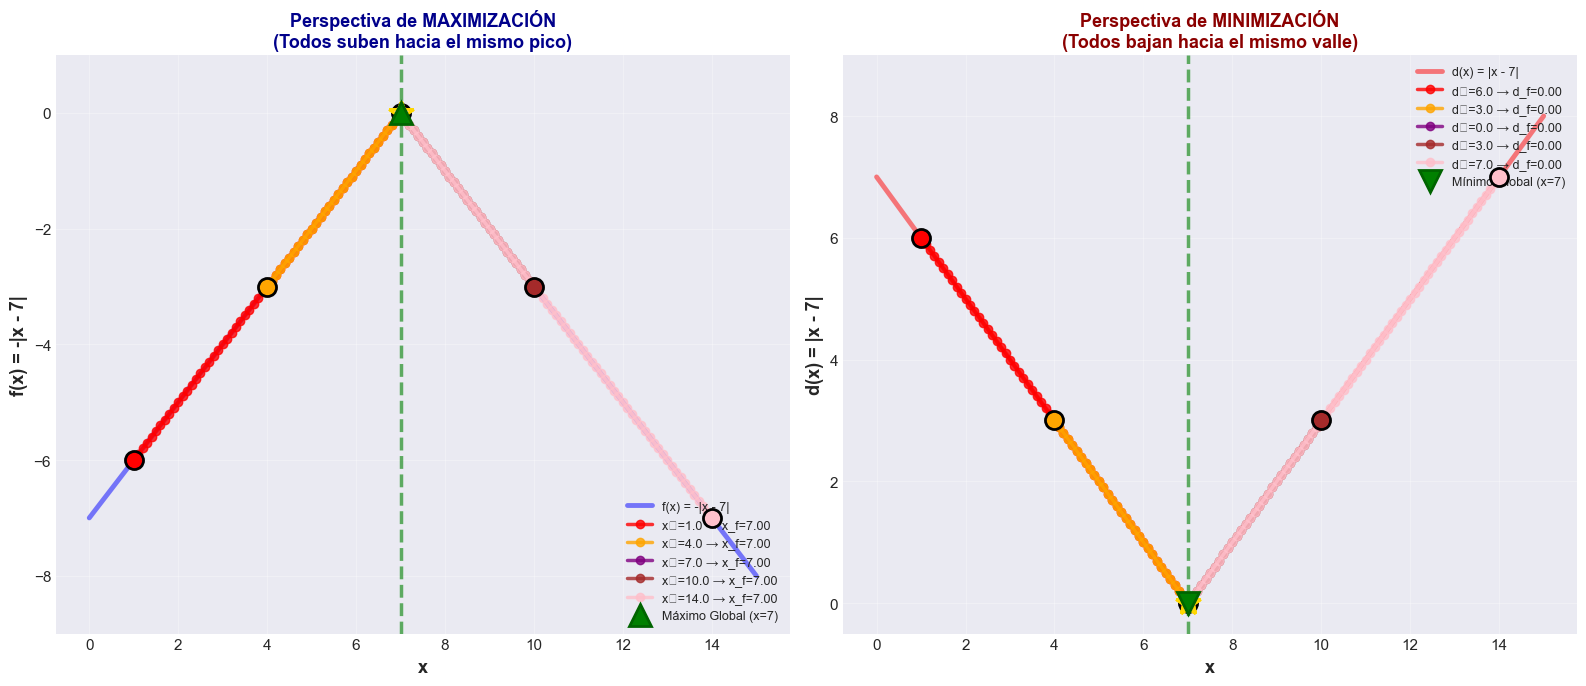


📊 TABLA RESUMEN DE RESULTADOS
Inicio     Final      d(inicio)    d(final)     Pasos    Éxito
----------------------------------------------------------------------
x=1.0     x=7.0000  6.0000       0.0000       60       ✅
x=4.0     x=7.0000  3.0000       0.0000       30       ✅
x=7.0     x=7.0000  0.0000       0.0000       0        ✅
x=10.0    x=7.0000  3.0000       0.0000       30       ✅
x=14.0    x=7.0000  7.0000       0.0000       70       ✅

📈 ESTADÍSTICAS:
   • Promedio de x final:         7.0000
   • Desviación estándar de x:    0.000000
   • Promedio de distancia final: 0.0000
   • Promedio de pasos:           38.0

💡 CONCLUSIÓN DEL EXPERIMENTO:
   ✅ Todos los caminos convergen a x ≈ 7.0 (error promedio: 0.0000)
   ✅ La distancia se minimiza consistentemente (promedio: 0.0000)
   ✅ La transformación min → max funciona perfectamente

🎯 PRINCIPIO DEMOSTRADO:
   Minimizar d(x) = |x-7| es EQUIVALENTE a maximizar f(x) = -|x-7|
   No importa desde dónde empecemos, siempre llegamos a 

In [5]:
# Experimento: Ejecutar desde múltiples puntos iniciales
puntos_iniciales = [1.0, 4.0, 7.0, 10.0, 14.0]
resultados = []

print("🧪 EXPERIMENTO: Hill Climbing desde Múltiples Puntos de Partida")
print("="*70)
print(f"Objetivo: Minimizar distancia a 7 (maximizar -|x-7|)")
print(f"Puntos de inicio: {puntos_iniciales}")
print("="*70)

for start in puntos_iniciales:
    print(f"\n{'='*70}")
    print(f"🎯 Ejecutando desde x = {start}")
    print(f"{'='*70}")
    x_f, hist = hill_climbing(start_x=start, step=step, domain=domain)
    resultados.append({
        'inicio': start,
        'final': x_f,
        'pasos': len(hist) - 1,
        'distancia_inicial': distancia(start),
        'distancia_final': distancia(x_f),
        'historial': hist
    })

# Visualizar todos los caminos juntos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Colores para cada camino
colores = ['red', 'orange', 'purple', 'brown', 'pink']

# ===== GRÁFICA 1: Perspectiva de Maximización =====
ax1.plot(x_valores, f_valores, 'b-', linewidth=3.5, alpha=0.5, 
         label='f(x) = -|x - 7|', zorder=1)

for i, res in enumerate(resultados):
    hist_array = np.array(res['historial'])
    f_hist = f(hist_array)
    ax1.plot(hist_array, f_hist, 'o-', color=colores[i], linewidth=2.5, 
             markersize=6, alpha=0.8,
             label=f"x₀={res['inicio']:.1f} → x_f={res['final']:.2f}",
             zorder=5)
    ax1.plot(hist_array[0], f_hist[0], 'o', color=colores[i], markersize=13, 
             markeredgewidth=2, markeredgecolor='black', zorder=6)
    ax1.plot(hist_array[-1], f_hist[-1], '*', color=colores[i], markersize=18, 
             markeredgewidth=2, markeredgecolor='gold', zorder=6)

ax1.axvline(x=7, color='green', linestyle='--', linewidth=2.5, alpha=0.6)
ax1.plot(7, 0, 'g^', markersize=16, markeredgewidth=2, markeredgecolor='darkgreen',
         label='Máximo Global (x=7)', zorder=7)

ax1.set_xlabel('x', fontsize=13, fontweight='bold')
ax1.set_ylabel('f(x) = -|x - 7|', fontsize=13, fontweight='bold')
ax1.set_title('Perspectiva de MAXIMIZACIÓN\n(Todos suben hacia el mismo pico)', 
              fontsize=13, fontweight='bold', color='darkblue')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='lower right', fontsize=9)
ax1.set_ylim(-9, 1)

# ===== GRÁFICA 2: Perspectiva de Minimización =====
ax2.plot(x_valores, d_valores, 'r-', linewidth=3.5, alpha=0.5, 
         label='d(x) = |x - 7|', zorder=1)

for i, res in enumerate(resultados):
    hist_array = np.array(res['historial'])
    d_hist = distancia(hist_array)
    ax2.plot(hist_array, d_hist, 'o-', color=colores[i], linewidth=2.5, 
             markersize=6, alpha=0.8,
             label=f"d₀={res['distancia_inicial']:.1f} → d_f={res['distancia_final']:.2f}",
             zorder=5)
    ax2.plot(hist_array[0], d_hist[0], 'o', color=colores[i], markersize=13, 
             markeredgewidth=2, markeredgecolor='black', zorder=6)
    ax2.plot(hist_array[-1], d_hist[-1], '*', color=colores[i], markersize=18, 
             markeredgewidth=2, markeredgecolor='gold', zorder=6)

ax2.axvline(x=7, color='green', linestyle='--', linewidth=2.5, alpha=0.6)
ax2.plot(7, 0, 'gv', markersize=16, markeredgewidth=2, markeredgecolor='darkgreen',
         label='Mínimo Global (x=7)', zorder=7)

ax2.set_xlabel('x', fontsize=13, fontweight='bold')
ax2.set_ylabel('d(x) = |x - 7|', fontsize=13, fontweight='bold')
ax2.set_title('Perspectiva de MINIMIZACIÓN\n(Todos bajan hacia el mismo valle)', 
              fontsize=13, fontweight='bold', color='darkred')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=9)
ax2.set_ylim(-0.5, 9)

plt.tight_layout()
plt.show()

# Tabla resumen de resultados
print("\n" + "="*70)
print("📊 TABLA RESUMEN DE RESULTADOS")
print("="*70)
print(f"{'Inicio':<10} {'Final':<10} {'d(inicio)':<12} {'d(final)':<12} {'Pasos':<8} {'Éxito'}")
print("-"*70)

for res in resultados:
    es_exito = "✅" if abs(res['final'] - 7.0) < step * 2 else "⚠️"
    print(f"x={res['inicio']:<7.1f} x={res['final']:<7.4f} "
          f"{res['distancia_inicial']:<12.4f} {res['distancia_final']:<12.4f} "
          f"{res['pasos']:<8} {es_exito}")

print("="*70)

# Estadísticas
finales = [res['final'] for res in resultados]
distancias_finales = [res['distancia_final'] for res in resultados]
promedio_final = np.mean(finales)
std_final = np.std(finales)
promedio_distancia = np.mean(distancias_finales)
promedio_pasos = np.mean([res['pasos'] for res in resultados])

print(f"\n📈 ESTADÍSTICAS:")
print(f"   • Promedio de x final:         {promedio_final:.4f}")
print(f"   • Desviación estándar de x:    {std_final:.6f}")
print(f"   • Promedio de distancia final: {promedio_distancia:.4f}")
print(f"   • Promedio de pasos:           {promedio_pasos:.1f}")

print("\n💡 CONCLUSIÓN DEL EXPERIMENTO:")
print(f"   ✅ Todos los caminos convergen a x ≈ 7.0 (error promedio: {abs(promedio_final - 7):.4f})")
print(f"   ✅ La distancia se minimiza consistentemente (promedio: {promedio_distancia:.4f})")
print(f"   ✅ La transformación min → max funciona perfectamente")
print("\n🎯 PRINCIPIO DEMOSTRADO:")
print("   Minimizar d(x) = |x-7| es EQUIVALENTE a maximizar f(x) = -|x-7|")
print("   No importa desde dónde empecemos, siempre llegamos a la misma solución.")
print("="*70)